# 분류
## 이진분류기

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [ ]:
#train 데이터와 target 데이터 생성
training_data = np.array(
    [[0,0], [0,1], [1,0], [1,1]], 'float32')
target_data = np.array(
    [[0], [1], [1], [0]], 'float32')

#xor 문제 해결 방안 : 차원을 늘려 레이어를 쌓고 레이어를 따라 자른다.

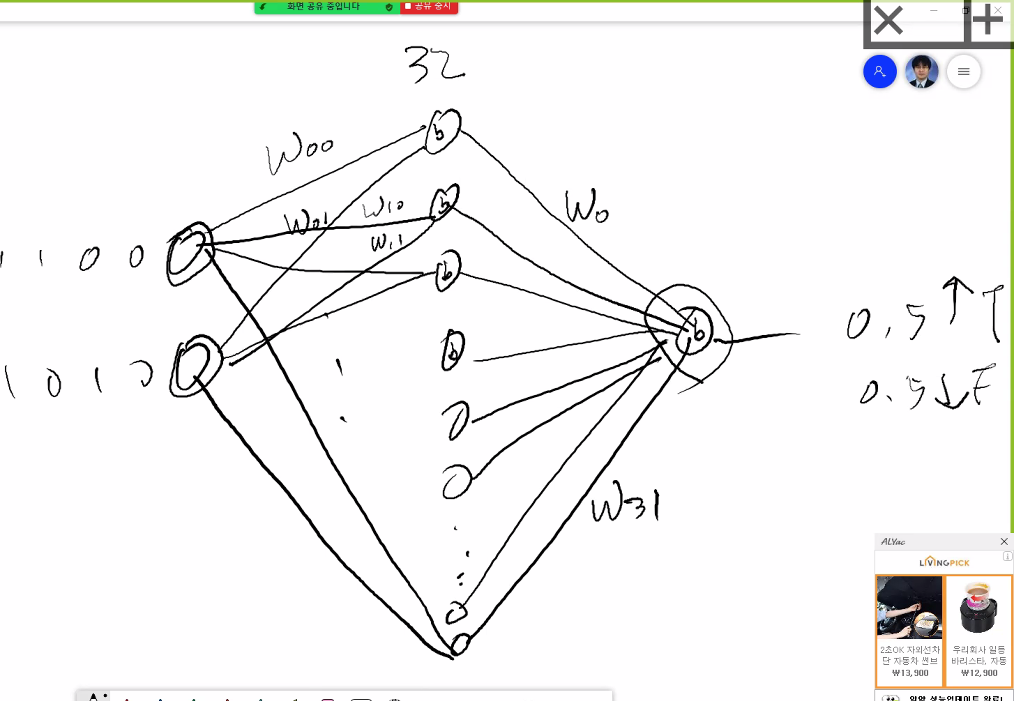

In [ ]:
model = Sequential()

#모두 웨이트(데이터) 32개
#앞 레이어에는 뇌세포가 32개, 입력값이 2개
#Dense 레이어는 조밀레이어(모든 데이터가 뇌세포와 1대1로 연결되어 있음)
model.add(Dense(32, input_dim=2, activation='relu'))

#뒤 레이어에는 뇌세포가 1개, 입력값이 1개, 바이어스 1개
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mse', optimizer='adam', metrics=['binary_accuracy'])

print(model.summary())

#첫번째 레이어 파라미터가 96개(32*2+32)
#두번째 레이어 파라미터가 33개(32*1+1)
#학습해야 할 내용(파라미터) 129개(96+33)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                96        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
fit_hist = model.fit(training_data, target_data, epochs=500, verbose=1)

Epoch 1/500
1/1 [==============================] - 0s 360ms/step - loss: 0.2497 - binary_accuracy: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2492 - binary_accuracy: 0.2500
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2486 - binary_accuracy: 0.2500
Epoch 4/500
1/1 [==============================] - 0s 3ms/step - loss: 0.2480 - binary_accuracy: 0.2500
Epoch 5/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2474 - binary_accuracy: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2469 - binary_accuracy: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2464 - binary_accuracy: 0.5000
Epoch 8/500
1/1 [==============================] - 0s 7ms/step - loss: 0.2458 - binary_accuracy: 0.5000
Epoch 9/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2454 - binary_accuracy: 0.5000
Epoch 10/500
1/1 [==============================] - 0s 3ms/ste

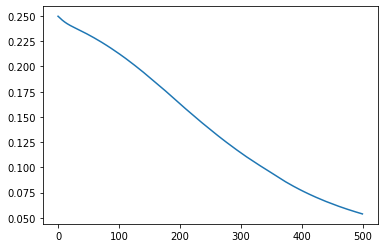

In [ ]:
plt.plot(fit_hist.history['loss'])
plt.show()

In [ ]:
inp = list(map(int, input().split()))
qwe = np.array(inp)
print('입력 값 : ', qwe)
qwe = qwe.reshape(1,2)
print('reshape : ', qwe)
print('결과 값 : ', model.predict(qwe)[0][0].round())

1 1
입력 값 :  [1 1]
reshape :  [[1 1]]
결과 값 :  0.0


1.   Dense에서 1 => 뇌세포의 개수 (tensor나 노드라고도 불림)
2.   민감도 = weight : 얼마나 강하게(많이) 정보(데이터)를 전달하는지
3.   activation => 활성화 함수 : 입력 신호의 총합을 출력 신호로 변환
4.   이진분류에선 sigmoid 사용. 출력단(맨 끝단)만 sigmoid 사용. 나머지 relu
5.   선형회귀 문제에서는 출력단에 activation 함수 사용 X
6.   분류문제에서는 accuracy 값이 중요
7.   이중분류는 binary_accuracy, 다중분류는 accuracy 사용
8.   optimizer는 adam을 사용

keras 파라미터 설명 : https://ebbnflow.tistory.com/120